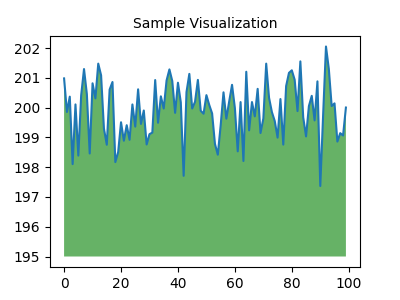

In [1]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [2]:
!git clone https://github.com/rslim087a/track

Cloning into 'track'...
Updating files:  15% (1880/12160)
Updating files:  16% (1946/12160)
Updating files:  17% (2068/12160)
Updating files:  18% (2189/12160)
Updating files:  19% (2311/12160)
Updating files:  20% (2432/12160)
Updating files:  21% (2554/12160)
Updating files:  22% (2676/12160)
Updating files:  23% (2797/12160)
Updating files:  24% (2919/12160)
Updating files:  25% (3040/12160)
Updating files:  26% (3162/12160)
Updating files:  27% (3284/12160)
Updating files:  28% (3405/12160)
Updating files:  29% (3527/12160)
Updating files:  30% (3648/12160)
Updating files:  31% (3770/12160)
Updating files:  31% (3787/12160)
Updating files:  32% (3892/12160)
Updating files:  33% (4013/12160)
Updating files:  34% (4135/12160)
Updating files:  35% (4256/12160)
Updating files:  36% (4378/12160)
Updating files:  37% (4500/12160)
Updating files:  38% (4621/12160)
Updating files:  39% (4743/12160)
Updating files:  40% (4864/12160)
Updating files:  41% (4986/12160)
Updating files:  42% (51

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
import sklearn
import matplotlib.image as mping

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
import ntpath

In [6]:
datadir='track'
columns= ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data= pd.read_csv(os.path.join(datadir,'driving_log.csv'), names= columns)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.615438


In [7]:
def path_leaf (path):
  head, tail= ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


<BarContainer object of 25 artists>

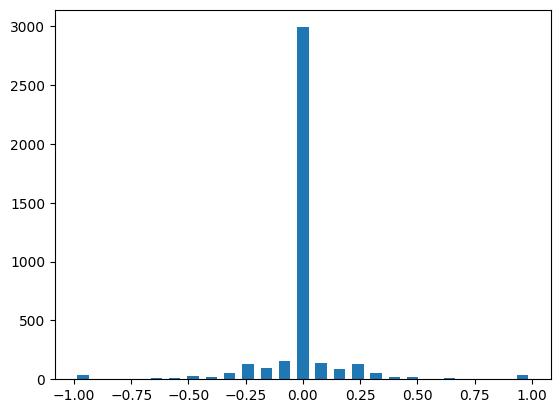

In [8]:
num_bins=25
hist, bins=np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins [1:]) * 0.5
plt.bar(center, hist, width=0.05)

total data: 4053
removed: 2690
remaining: 1363


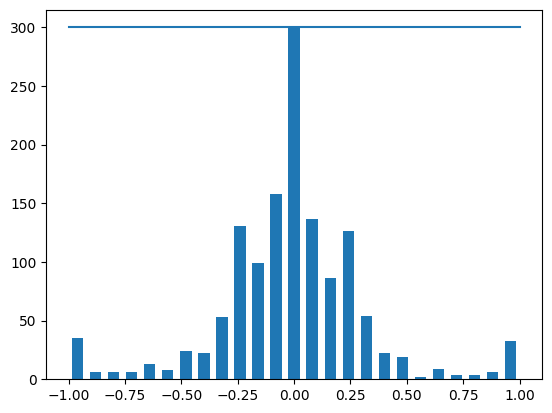

In [9]:
print('total data:', len(data))
samples_per_bin = 300
remove_list = []
for j in range(num_bins):
  list_ = []
  # Iterate through the DataFrame using .iterrows() to get index and row data
  for index, row in data.iterrows():
    if row['steering'] >= bins[j] and row['steering'] <= bins[j+1]:
      list_.append(index) # Append the index to the list_
  random.shuffle(list_)
  list_= list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len (remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))
hist,_ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [10]:
print(data.iloc[1])
def load_img_steering (datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data= data.iloc[i]
    center, left, right= indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths=np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
image_paths, steerings= load_img_steering(datadir + '/IMG', data)

center      center_2018_07_16_17_11_44_485.jpg
left          left_2018_07_16_17_11_44_485.jpg
right        right_2018_07_16_17_11_44_485.jpg
steering                                 -0.25
throttle                              0.863326
reverse                                    0.0
speed                                 2.173052
Name: 13, dtype: object


C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_5968\3212579323.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right= indexed_data[0], indexed_data[1], indexed_data[2]
C:\Users\SHRUTI\AppData\Local\Temp\ipykernel_5968\3212579323.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))


In [11]:
X_train, X_valid, y_train, y_valid=train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1090
Valid Samples: 273


Text(0.5, 1.0, 'Validation set')

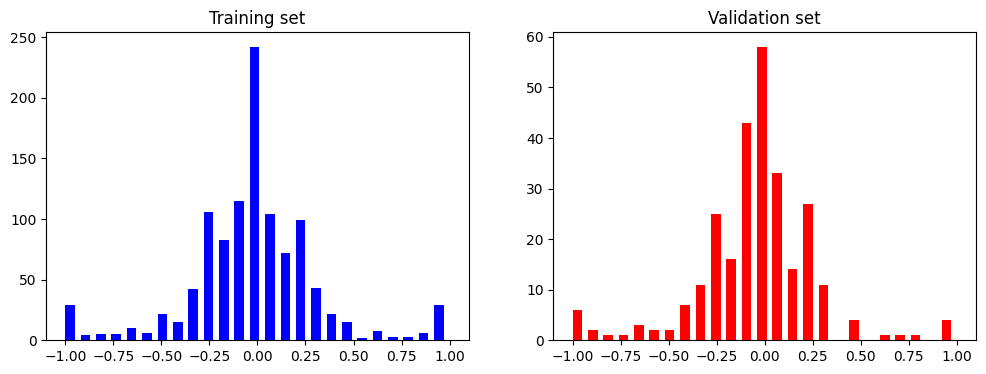

In [12]:
figs,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [13]:
def img_preprocess(img):
  img= mping.imread(img)
  img=img[60:135,:,:]
  img=cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img, (3, 3), 0)
  cv2.resize(img,(200,66))
  img=img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

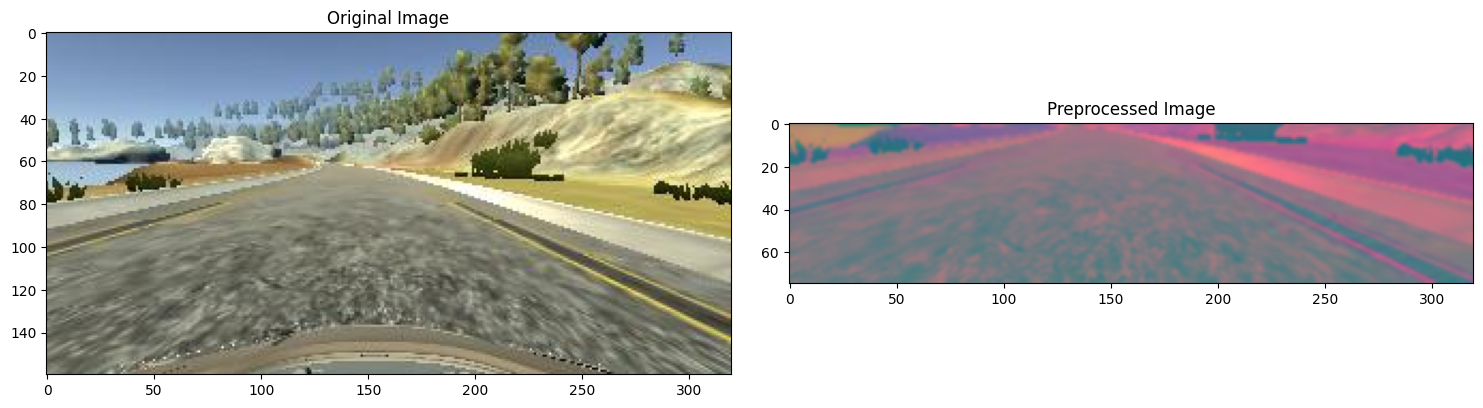

In [14]:
image= image_paths [100]
original_image= mping.imread(image)
preprocessed_image=img_preprocess(image)
fig, axs= plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')